# Import libraries

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# read the dataset

In [2]:
df = pd.read_csv('MicrosoftStock.csv')

# check the shape of the dataset

In [3]:
# number of rows
print(f'Number of rows: {df.shape[0]}')

# number of columns
print(f'Number of columns: {df.shape[1]}')

Number of rows: 1259
Number of columns: 8


# check the dataset

In [4]:
df

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


# check for null-nan values

In [5]:
df.isnull().mean() * 100

index     0.0
date      0.0
open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
Name      0.0
dtype: float64

# drop unuseful columns

In [6]:
df.drop(['index', 'Name'], axis=1, inplace=True)

In [7]:
df

,date,open,high,low,close,volume
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174
...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564


# check the info (data types) of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


# convert date column from object type to datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1259 entries, 0 to 1258
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1259 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.0 KB


# split date column to day, month, year

In [11]:
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)
df['day'] = df['date'].dt.day.astype(int)

In [12]:
df

,date,open,high,low,close,volume,year,month,day
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306,2013,2,8
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549,2013,2,11
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829,2013,2,12
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530,2013,2,13
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174,2013,2,14
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,2018,2,1
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,2018,2,2
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,2018,2,5
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,2018,2,6


In [13]:
# drop date column
df.drop('date', axis=1, inplace=True)

In [14]:
df

,open,high,low,close,volume,year,month,day
0,27.35,27.710,27.3100,27.55,33318306,2013,2,8
1,27.65,27.920,27.5000,27.86,32247549,2013,2,11
2,27.88,28.000,27.7500,27.88,35990829,2013,2,12
3,27.93,28.110,27.8800,28.03,41715530,2013,2,13
4,27.92,28.060,27.8700,28.04,32663174,2013,2,14
...,...,...,...,...,...,...,...,...
1254,94.79,96.070,93.5813,94.26,47227882,2018,2,1
1255,93.64,93.970,91.5000,91.78,47867753,2018,2,2
1256,90.56,93.240,88.0000,88.00,51031465,2018,2,5
1257,86.89,91.475,85.2500,91.33,67998564,2018,2,6


# make plots

C:\Users\nick-\AppData\Local\Temp\ipykernel_7708\3068774108.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='close', palette='dark', errorbar=None)


<Axes: xlabel='year', ylabel='close'>

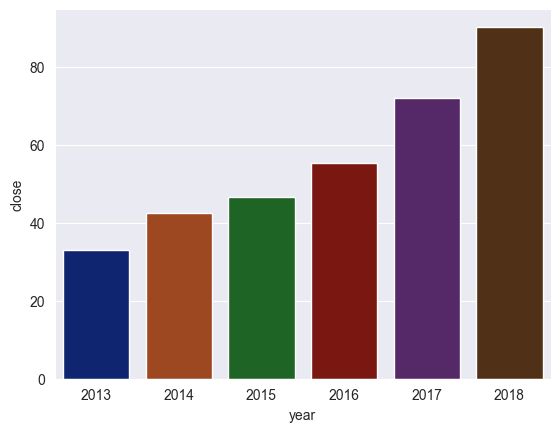

In [15]:
sns.barplot(data=df, x='year', y='close', palette='dark', errorbar=None)

# split the dataset

In [16]:
# all the columns except the target column
X = df.drop('close', axis=1)

# target column
y = df['close']

In [17]:
# import train_split function
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [18]:
# import Linear Regression model
from sklearn.linear_model import LinearRegression

# create an instance of Linear Regression
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
df

,open,high,low,close,volume,year,month,day
0,27.35,27.710,27.3100,27.55,33318306,2013,2,8
1,27.65,27.920,27.5000,27.86,32247549,2013,2,11
2,27.88,28.000,27.7500,27.88,35990829,2013,2,12
3,27.93,28.110,27.8800,28.03,41715530,2013,2,13
4,27.92,28.060,27.8700,28.04,32663174,2013,2,14
...,...,...,...,...,...,...,...,...
1254,94.79,96.070,93.5813,94.26,47227882,2018,2,1
1255,93.64,93.970,91.5000,91.78,47867753,2018,2,2
1256,90.56,93.240,88.0000,88.00,51031465,2018,2,5
1257,86.89,91.475,85.2500,91.33,67998564,2018,2,6


# Predictions

In [20]:
# make random selections from the column
random_sample = np.array([[random.choice(X_test[col].values) for col in X_test.columns]])

random_sample

array([[5.5660000e+01, 6.3810000e+01, 2.8660000e+01, 2.2857854e+07,
        2.0130000e+03, 8.0000000e+00, 5.0000000e+00]])

In [21]:
prediction = lr.predict(random_sample)

# convert to numerical value
predicted_value = prediction[0]
print(f'Model prediction: {predicted_value}')

Model prediction: 39.40499072391364


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Residual (Error)

In [22]:
# create a list with the y_test values
list_values = list(y_test)

# grab a random value from this list
actual_value = random.choice(list_values)

In [ ]:
# calculate the residual (error)
error = abs(actual_value - prediction)
square_error = error * error

print(f'Error: {square_error}')